In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
import pickle
import tensorflow.keras.utils as keras_utils
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = os.path.join('/content/drive/MyDrive/Capstone Project/Batik_DataSet_V2_Ver1')

img_size = 224
batch_size = 80

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    rescale = 1./255,
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (img_size, img_size),
    class_mode = 'categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (img_size, img_size),
    class_mode = 'categorical',
    subset='validation'
)

Found 4664 images belonging to 20 classes.
Found 1163 images belonging to 20 classes.


In [ ]:
mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
inception_v3 = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"

classifier_model = mobilenet_v2

IMAGE_SHAPE = (224, 224)

feature_extractor = hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE+(3,))

In [ ]:
model = tf.keras.models.Sequential([
    feature_extractor,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 flatten (Flatten)           (None, 1001)              0         
                                                                 
 dropout (Dropout)           (None, 1001)              0         
                                                                 
 dense (Dense)               (None, 512)               513024    
                                                                 
 dense_1 (Dense)             (None, 20)                10260     
                                                                 
Total params: 4,063,549
Trainable params: 523,284
Non-trainable params: 3,540,265
_________________________________________________________________


In [ ]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', 
              optimizer = Adam(), 
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_generator, 
                    epochs=100, 
                    validation_data = val_generator) 

Epoch 1/100
146/146 [==============================] - 1263s 9s/step - loss: 2.2691 - accuracy: 0.3885 - val_loss: 1.1594 - val_accuracy: 0.6801
Epoch 2/100
146/146 [==============================] - 314s 2s/step - loss: 1.1899 - accuracy: 0.6308 - val_loss: 0.8009 - val_accuracy: 0.7713
Epoch 3/100
146/146 [==============================] - 313s 2s/step - loss: 0.8281 - accuracy: 0.7431 - val_loss: 0.6043 - val_accuracy: 0.8186
Epoch 4/100
146/146 [==============================] - 291s 2s/step - loss: 0.6288 - accuracy: 0.8025 - val_loss: 0.5029 - val_accuracy: 0.8530
Epoch 5/100
146/146 [==============================] - 316s 2s/step - loss: 0.4936 - accuracy: 0.8437 - val_loss: 0.4306 - val_accuracy: 0.8719
Epoch 6/100
146/146 [==============================] - 293s 2s/step - loss: 0.3904 - accuracy: 0.8786 - val_loss: 0.3807 - val_accuracy: 0.8848
Epoch 7/100
146/146 [==============================] - 305s 2s/step - loss: 0.3343 - accuracy: 0.8979 - val_loss: 0.3504 - val_accuracy

In [ ]:
# Save the training history to a file
history_path = '/content/drive/MyDrive/Capstone Project/savedModelV2/training_history_v20_2_NIM_E100.pickle'

with open(history_path, 'wb') as file:
    pickle.dump(history.history, file)

# Save the trained model
model_path = '/content/drive/MyDrive/Capstone Project/savedModelV2/training_history_v20_2_NIM_E100.h5'
model.save(model_path)

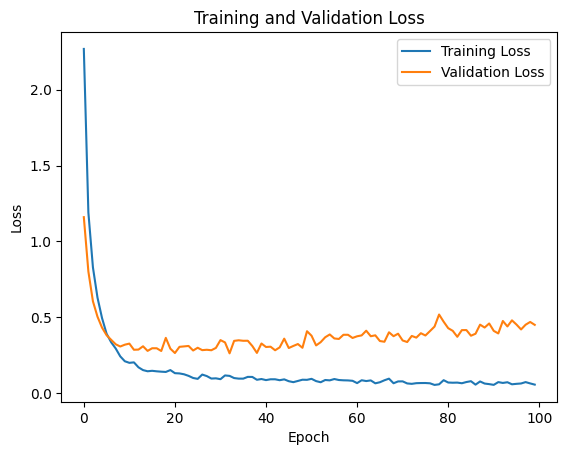

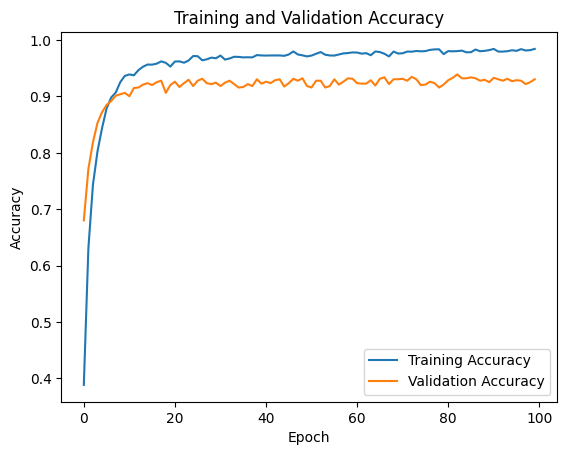

In [ ]:
import matplotlib.pyplot as plt

# Load the training history from the saved file
history_path = '/content/drive/MyDrive/Capstone Project/savedModelV2/training_history_v20_2_NIM_E100.pickle'

with open(history_path, 'rb') as file:
    history = pickle.load(file)

# Plot the training and validation loss
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()